<a href="https://colab.research.google.com/github/rozanauf/Tugas/blob/main/RozanNauf_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f1=1800 #MHz
f2=900 #MHz
f3=700 #MHz
loc='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [5]:
#Pathloss based on Location
lpurban=cos(f1,loc,tower,user,d)
lpsuburban=cos(f1,loc2,tower,user,d)
lpopen=cos(f1,loc3,tower,user,d)

In [8]:
d_sort=d[np.argsort(d)]
lpurban_sort=lpurban[np.argsort(d)]
lpsuburban_sort=lpsuburban[np.argsort(d)]
lpopen_sort=lpopen[np.argsort(d)]

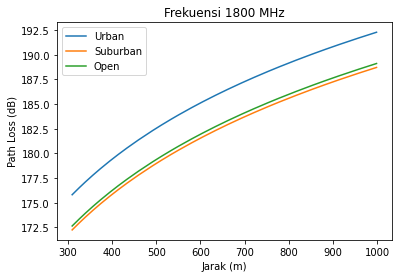

In [9]:
plt.figure()
plt.plot(d_sort,lpurban_sort, label="Urban")
plt.plot(d_sort,lpsuburban_sort, label="Suburban")
plt.plot(d_sort,lpopen_sort, label="Open")
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()

In [10]:
#Pathloss based on frequency
freq1=cos(f1,loc,tower,user,d)
freq2=cos(f2,loc,tower,user,d)
freq3=cos(f3,loc,tower,user,d)

In [11]:
d_sort=d[np.argsort(d)]
freq1_sort=freq1[np.argsort(d)]
freq2_sort=freq2[np.argsort(d)]
freq3_sort=freq3[np.argsort(d)]

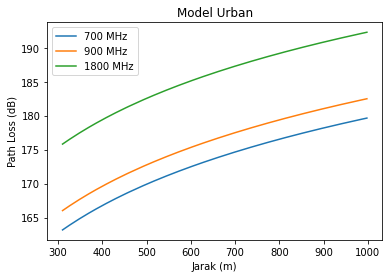

In [12]:
plt.figure()
plt.plot(d_sort,freq3_sort, label="700 MHz")
plt.plot(d_sort,freq2_sort, label="900 MHz")
plt.plot(d_sort,freq1_sort, label="1800 MHz")
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()

In [13]:
def powerRx(ptx,pl,gtx,grx):
  ptxdb=10*np.log10(ptx*1000) #dbm
  prx = ptxdb - pl + gtx + grx #dbm
  prxn = 10**(prx/10) #numerik

  return prxn

In [14]:
#Power based on location
powerurban=powerRx(30,lpurban,10,2)
powersuburban=powerRx(30,lpsuburban,10,2)
poweropen=powerRx(30,lpopen,10,2)

In [15]:
d_sort=d[np.argsort(d)]
powerurban_sort=powerurban[np.argsort(d)]
powersuburban_sort=powersuburban[np.argsort(d)]
poweropen_sort=poweropen[np.argsort(d)]

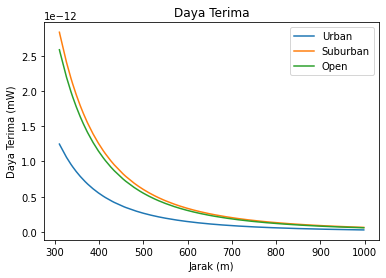

In [16]:
plt.figure()
plt.plot(d_sort,powerurban_sort, label="Urban")
plt.plot(d_sort,powersuburban_sort, label="Suburban")
plt.plot(d_sort,poweropen_sort, label="Open")
plt.title('Daya Terima')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.legend()
plt.show()

In [17]:
#Power based on frequency
powerfreq1=powerRx(30,freq1,10,2)
powerfreq2=powerRx(30,freq2,10,2)
powerfreq3=powerRx(30,freq3,10,2)

In [18]:
d_sort=d[np.argsort(d)]
powerfreq1_sort=powerfreq1[np.argsort(d)]
powerfreq2_sort=powerfreq2[np.argsort(d)]
powerfreq3_sort=powerfreq3[np.argsort(d)]

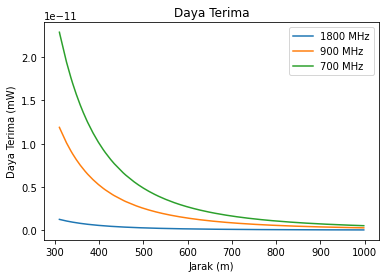

In [19]:
plt.figure()
plt.plot(d_sort,powerfreq1_sort, label="1800 MHz")
plt.plot(d_sort,powerfreq2_sort, label="900 MHz")
plt.plot(d_sort,powerfreq3_sort, label="700 MHz")
plt.title('Daya Terima')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.legend()
plt.show()

In [20]:
def snr(prx,bw):
  bwh = bw*1000000
  noise = (-174) + (10*np.log10(bwh))
  noisen = 10**(noise/10)
  snratio = prx/noisen

  return snratio

In [22]:
#SNR based on location
snrurban = snr(powerurban,5)
snrsuburban = snr(powersuburban,5)
snropen = snr(poweropen,5)

#SNR based on frequency
snrfreq1 = snr(powerfreq1,5)
snrfreq2 = snr(powerfreq2,5)
snrfreq3 = snr(powerfreq3,5)

In [24]:
d_sort=d[np.argsort(d)]
snrurban_sort=snrurban[np.argsort(d)]
snrsuburban_sort=snrsuburban[np.argsort(d)]
snropen_sort=snropen[np.argsort(d)]
snrfreq1_sort=snrfreq1[np.argsort(d)]
snrfreq2_sort=snrfreq2[np.argsort(d)]
snrfreq3_sort=snrfreq3[np.argsort(d)]

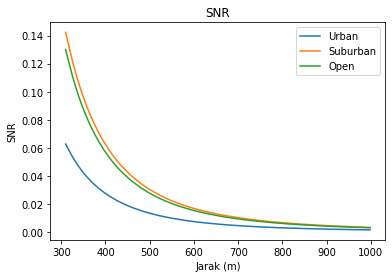

In [26]:
plt.figure()
plt.plot(d_sort,snrurban_sort, label="Urban")
plt.plot(d_sort,snrsuburban_sort, label="Suburban")
plt.plot(d_sort,snropen_sort, label="Open")
plt.title('SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.legend()
plt.show()

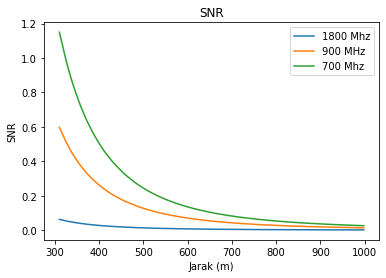

In [27]:
plt.figure()
plt.plot(d_sort,snrfreq1_sort, label="1800 Mhz")
plt.plot(d_sort,snrfreq2_sort, label="900 MHz")
plt.plot(d_sort,snrfreq3_sort, label="700 Mhz")
plt.title('SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.legend()
plt.show()

In [28]:
def kapsel(snr,bw):
  bwh = bw*1000000
  kpsts = bwh*(np.log2(1+snr))
  return kpsts

In [29]:
#Kapasitas seluler based on location
kpstsurban = kapsel(snrurban,5)
kpstssuburban = kapsel(snrsuburban,5)
kpstsopen = kapsel(snropen,5)

#Kapasitas seluler based on frequency
kpstsfreq1 = kapsel(snrfreq1,5)
kpstsfreq2 = kapsel(snrfreq2,5)
kpstsfreq3 = kapsel(snrfreq3,5)

In [30]:
d_sort=d[np.argsort(d)]
kpstsurban_sort=kpstsurban[np.argsort(d)]
kpstssuburban_sort=kpstssuburban[np.argsort(d)]
kpstsopen_sort=kpstsopen[np.argsort(d)]
kpstsfreq1_sort=kpstsfreq1[np.argsort(d)]
kpstsfreq2_sort=kpstsfreq2[np.argsort(d)]
kpstsfreq3_sort=kpstsfreq3[np.argsort(d)]

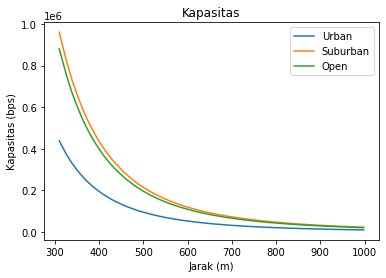

In [31]:
plt.figure()
plt.plot(d_sort,kpstsurban_sort, label="Urban")
plt.plot(d_sort,kpstssuburban_sort, label="Suburban")
plt.plot(d_sort,kpstsopen_sort, label="Open")
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()

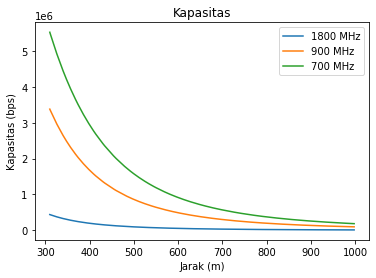

In [32]:
plt.figure()
plt.plot(d_sort,kpstsfreq1_sort, label="1800 MHz")
plt.plot(d_sort,kpstsfreq2_sort, label="900 MHz")
plt.plot(d_sort,kpstsfreq3_sort, label="700 MHz")
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()